Ella Watkins Problem Set 1. Bi/BE/CS 183
20170203

In [3]:
#Imports needed for code below
from collections import Counter
import pandas as pd
import numpy as np
import math
from random import randint
import random
from IPython.display import Image

# 1. What is the time complexity of the following sorting algorithm? Explain the reasoning behind this time complexity, and then write code (pseudocode is okay) for a sorting algorithm that runs in O(nlogn) time.

This sorting algorithm is known as "insertion sort" and runs at best O(n), and at worst $O(n^2)$
This is because in the best case scenario, everything is already sorted and the algorithm needs to only check each set of numbers once. In the worst case scenario, all of the numbers are in reverse order and you have to iterate through the while loop 1 more time than the previous each time as i increases. For example, if one were to run the code on the array of numbers [4,3,2,1]: This table describes how the algorithm runs through the array each time. 

| i =  | j =  | array[j-1] | < or > | array[j] | Swap? | 0 | 1 | 2 | 3 |
|------|------|------------|--------|----------|-------|---|---|---|---|
| 0    | 0    |            |        |          | N/A   | 4 | 3 | 2 | 1 |
| 1    | 1    | 4          | >      | 3        | Yes   | 3 | 4 | 2 | 1 |
| 1    | 0    | -          | -      | -        | N/A   | - | - | - | - |
| 2    | 2    | 4          | >      | 2        | Yes   | 3 | 2 | 4 | 1 |
| 2    | 1    | 3          | >      | 1        | Yes   | 2 | 3 | 4 | 1 |
| 3    | 3    | 4          | >      | 1        | Yes   | 2 | 3 | 1 | 4 |
| 3    | 2    | 3          | >      | 1        | Yes   | 2 | 1 | 3 | 4 |
| 3    | 1    | 2          | >      | 1        | Yes   | 1 | 2 | 3 | 4 |

In this case, every time i increases by 1, the number of times you must run through the while loop increases by 1. 




## O(nlogn) time pseudocode:

For this, I am writing a pseudocode for the Heapsort algorithm, at best and worst case scenario it is O(nlogn)


    HeapSort(A)
    1. Build-MAX-HEAP(A) (MAX-HEAPIFY)
    
    #MAX-HEAPIFY is a way of organizing the array such that all "parent nodes" are greater than the "children nodes." To execute MAX-HEAPIFY, the parent closest to the bottom of the tree is compared with its children. If the child is greater than the parent, then the parent and child are swapped. This is continued up the tree at each parent node until the apex of tree is reached. Once the apex is reached, you start at bottom parent again and check that all parents are greater than children nodes. When tree is in "Maxheapify" format, continue onto next step. 
    
    2. For i <-- length[A] downto 2
    3.       do exchange A[1] <-> A[i]
    4.              heap-size[A] <-- heapsize[A]-1
    
    #Steps 2-4: Next, swap the first and last number in array (first number should be the greatest number in the array.) Then, make the heapsize 1 smaller so that the last number of the array is no longer in the heap (It will now remain untouched during the next rounds of re-organizing the array)
    
    5.              MAX-HEAPIFY(A,1)
    
    #Now, you repeat the entire process with the new, smaller by 1 heap. It will move the 2nd largest number in array to the 2nd to last position. Process is repeated iteratively until all numbers have been sorted. 
    


# 2. Find the alignments that overlap the region chr17:220-300
I used the program "Geneious" to find the alignments. (http://www.geneious.com/) (I have a personal liscence) 

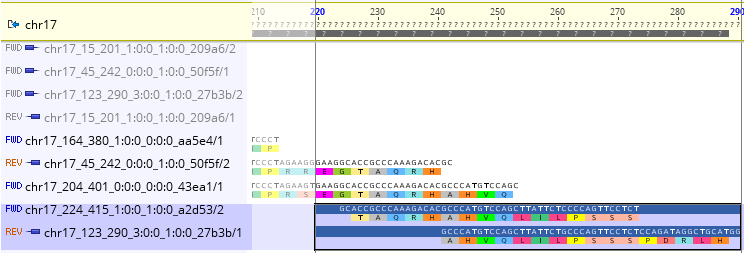

In [5]:
Image('BAM_file.png')

# 3.

## 3A Given the sequences below: Calculate the observed and expected frequency of each possible 4-mer assuming each nucleotide appears at a probability of ¼

In [6]:
def listofallkmers(len_of_kmer, sequences):
    """
    This fxn takes a sequence and returns a list of all of the k-mers that exist
    """
    kmers = []
    for j in range(0, len(sequences)):
        seq_len = len(sequences[j])
        for i in range (0, seq_len):
            kmer = sequences[j][i:i+len_of_kmer]
            if len(kmer) == len_of_kmer:
                kmers.append(kmer)
    return kmers

# test = ["AAAAAT", 'AAAAG']
# print(listofallkmers(4, test))

def freq_of_kmers(kmer_list):
    """
    This fxn takes a list of kmers and counts the number of each different kmer, then calculates its frequency 
    of occurence in the sequence. It then takes that dictionary of frequencies and turns it into a Pandas dataframe. 
    The Pandas dataframe is sorted for easy viewing. 
    """
    
    len_kmer_list = len(kmer_list)
    kmer_dict = dict(Counter(kmer_list))
    
    for key, value in kmer_dict.items():
        kmer_dict[key] = value / len_kmer_list
        
    df = pd.DataFrame.from_dict(kmer_dict, orient='index', dtype=None)
    df = df.reset_index()
    df = df.rename(index=str, columns={ 0:'Observed_Frequency', 'index':'Sequence'})
    df = df.sort_values(by = 'Observed_Frequency', ascending = False)
    df['Expected_Frequency_at_random'] = 1/62
              
    return df

seqs= ['AGTCGTACGTGAC', 
       'AGTAGACGTGCCG',
       'ACGTGAGATACGT',
       'GAACGGAGTACGT',
       'TCGTGACGGTGAT']
list_seqquestion3_kmers = listofallkmers(4, seqs)
freq_4mers_question3 = freq_of_kmers(list_seqquestion3_kmers)
freq_4mers_question3

,Sequence,Observed_Frequency,Expected_Frequency_at_random
31,ACGT,0.10,0.016129
17,GTGA,0.08,0.016129
13,CGTG,0.08,0.016129
19,TACG,0.06,0.016129
9,ACGG,0.04,0.016129
27,GTAC,0.04,0.016129
20,GACG,0.04,0.016129
0,TGAC,0.04,0.016129
3,AGTA,0.04,0.016129
6,TCGT,0.04,0.016129


## 3B/C Are any 4-mers more common than you’d expect? If so, which ones? Highlight the unexpected 4-mer motifs that you discovered in the sequences below.
I chose to underline the 4 most commonly ocurring 4-mers that occur more frequently than expected: ACGT, GTGA, CGTG, TACG. 

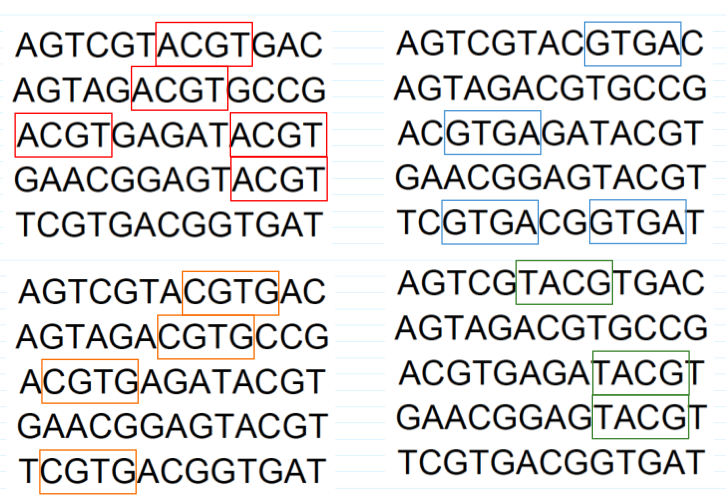

In [7]:
Image('freq_sequences.png')

# 4. Given a file of sequences (sequences.txt, on our course website)

## 4A Implement a simple method that scores the Hamming distance for a pattern against each subsequence

In [95]:
def hamming_distance(Dna_str, pattern):
    """
    This code computes the hamming distance for all kmers of pattern length and determines 
    the smallest hamming distance of all kmers (could be 0, but could be greater also). 
    Output is an array of numbers corresponding to the hamming distance for each subsequence. 
    """
    len_pattern = len(pattern)
    seq_len = len(Dna_str)
    
    hamming_distances = []
    
    for i in range(0, seq_len-len(pattern)+1):
        kmer = Dna_str[i:i+len_pattern]
        diffs = 0
        for ch1, ch2 in zip(kmer, pattern):
            if ch1 != ch2:
                diffs += 1
        hamming_distances.append((kmer, diffs))
    
    return hamming_distances

#Example 
print(hamming_distance('AAAAT', 'AG'))

[('AA', 1), ('AA', 1), ('AA', 1), ('AT', 1)]


## 4B Use your methods to score the following patterns using simple Hamming distance.

In [96]:
def min_hamming_distance(Dna_str, pattern):
    """
    This code computes the hamming distance for all kmers of pattern length and determines 
    the smallest hamming distance of all kmers (could be 0, but could be greater also)
    """
    len_pattern = len(pattern)
    seq_len = len(Dna_str)
    
    hamming_distances = []
    
    for i in range(0, seq_len-len(pattern)+1):
        kmer = Dna_str[i:i+len_pattern]
        diffs = 0
        for ch1, ch2 in zip(kmer, pattern):
            if ch1 != ch2:
                diffs += 1
        hamming_distances.append(diffs)
    lowest_hamming_distance = min(float(s) for s in hamming_distances)
    
    return lowest_hamming_distance

def sum_hamming_distances(all_sequences, pattern):
    total_hamming_sum = 0
    for seq in all_sequences:
        min_hamming = min_hamming_distance(seq, pattern)
        total_hamming_sum += min_hamming
    return total_hamming_sum

In [97]:
#Importing the sequences.txt
sequences = (open('atom_sequences', 'r').read().split('\n'))
patterns = ('TTGTAGG', 'GAGGACC', 'TATACGG', 'CCGCAGG', 'CAGCAGG')

pattern_hd = []
for p in patterns:
    pattern_hd.append(sum_hamming_distances(sequences, p))
print(pattern_hd)

d = { 'Hamming_distance_sums' : pd.Series(pattern_hd),'pattern': pd.Series(patterns)}
hd_df = pd.DataFrame(d)
hd_df

[40.0, 43.0, 44.0, 28.0, 11.0]


,Hamming_distance_sums,pattern
0,40.0,TTGTAGG
1,43.0,GAGGACC
2,44.0,TATACGG
3,28.0,CCGCAGG
4,11.0,CAGCAGG


The implanted sequence has the lowest Hamming distance and is "CAGCAGG"

## 4D What is the entropy of the discovered motif?

1. Find motif with smallest hamming distance
2. Find subseq that gives lowest hamming distance for the implanted motif, 
3. make pwm from those subsequences
4. use pwm to calc entropy. 

In [99]:
def min_hamming_sequences(sequences, pattern):
    kmer_len = len(pattern)
    all_kmers_lists = []
    for seq in sequences:
        kmers = []
        #Run through each possible subsequence of a sequence
        for i in range (0, len(seq)):
            subseq = seq[i:i+kmer_len]
            if len(subseq) == kmer_len:
                kmers.append(subseq)
        all_kmers_lists.append(kmers)
#     print(all_kmers_lists)
        
    min_hamming_distance_kmers = []
    for kmers_list in all_kmers_lists:
        hamming_distances = []
        for kmer in kmers_list:
            hamming_distance = sum(1 for a, b in zip(kmer, pattern) if a != b)
            hamming_distances.append(hamming_distance)
#             print(hamming_distance)
        min_kmer = kmers_list[np.argmin(hamming_distances)]
        min_hamming_distance_kmers.append(min_kmer)
    return min_hamming_distance_kmers

# test = ('AGCATAAA', 'GGAGCATA', 'CCAGCATA')
# print(min_hamming_sequences(test, 'GCAT'))
    

def profile_weighted_matrix(kmers, kmer_len):
    '''
    Fxn takes a set of kmers and calculates a profile weighted matrix (unweighted.) Pseudocounts have been added. 
    Structure of matrix count: 
    [Row 1: A counts
     Row 2: C counts
     Row 3: G counts
     Row 4: T counts]
    '''
    pm = np.ones((4, kmer_len))
    for seq in kmers:
        for i in range(kmer_len):
            if seq[i] == 'A':
                pm[0, i] += 1 
            elif seq[i] == 'C':
                pm[1, i] += 1
            elif seq[i] == 'G':
                 pm[2, i] += 1
            elif seq[i] == 'T':
                 pm[3, i] += 1   
                    
    len_kmers = len(kmers)
    pwm = pm/(len_kmers+4)
    return pwm

def entropy(pwm):
    '''
    This function takes a PWM and calculates the entropy:
    Step 1: Multiply each element of the array by log2
    Step 2: Multiply the above array by the original PWM array (this way you get p_i(log_2(p_i)))
    Step 3: Get rid of the nan's (these occur when you have a probability of 0)
    Step 4: Muliply everything by -1 
    Step 5: Compute the average entropy of all entropies. 
    '''
    pwm_step1 = np.log2(pwm)
    pwm_step2 = np.multiply(pwm, pwm_step1)
    pwm_step3 = np.multiply(pwm_step2, -1)
    pwm_step4 = np.nan_to_num(pwm_step3)
    pwm_step5 = [sum(x) for x in zip(*pwm_step4)]
    average_entropy = np.mean(pwm_step5)
    return average_entropy

In [161]:
smallest_hamming_motifs = min_hamming_sequences(sequences,'CAGCAGG')
# print(smallest_hamming_motifs)
pwm_smallest_hamming_motifs = profile_weighted_matrix(smallest_hamming_motifs, 7)
entropy_of_seq = entropy(pwm_smallest_hamming_motifs)
print('The entropy of the sequence is %s' %entropy_of_seq)

The entropy of the sequence is 0.853901538437


# 5. Given z iteration steps on average, what is the probability that you will find the correct motif using the randomized search algorithm, and how many restarts would you need on average to find the correct motif?

The probability that you select the correct motif is dependent upon the sequence content, and the length of the kmer. For example, if you have 1000 sequences of 'A' repeating, and you are looking for a kmer, you will always be able to find the it on the first try every time. However, this is not realistic, and in reality you will have all 4 base pairs relatively evenly distributed and it will take much longer to converge on a solution. 
You need to run the search algorithm an infinite number of times to be *sure* that you have converged on the correct motif. 

# 6. Now we will ask you to implement a randomized motif search. Using the file sequences.txt given in problem 5, find the motif using a randomized motif search. What profile matrix is obtained by running the algorithm once? 10 times? 1000 times?

In [21]:
def select_random_kmers(sequences, kmer_len):
    #Randomly select a kmer from each sequence and put into a list
    kmers = []
    for seq in sequences:
        kmer = []
        #To ensure I always get kmers of the length we want (and don't get short kmers that run off the sequence)
        while len(kmer) != kmer_len:
            rand_int = randint(0, len(seq))
            kmer = seq[rand_int: rand_int+kmer_len]
            if len(kmer) == kmer_len:
                kmers.append(kmer)
    return kmers

def profile_most_probable_kmer(sequences, kmer_len, pwm):
    """
    Fxn takes a pwm and determines the most probable kmers from each sequence
    """
    new_kmers = []
    for seq in sequences:
        #Run through each possible subsequence of a sequence
        scores = []
        subseqs = []
        for i in range (0, len(seq)):
            subseq = seq[i:i+kmer_len]
            
            #Make sure the subseq is long enough (just ensuring end of sequence isn't tried as subseq)
            if len(subseq) == kmer_len:  
                
                #Calculate the score for each subsequence
                #Starting score at 1 beacause you can't multiply by 0. 
                score = 1
                for j in range(0,kmer_len):
                    if subseq[j] == 'A':
                        score = pwm[0,j]*score
                    elif subseq[j] == 'C':
                        score = pwm[1,j]*score
                    elif subseq[j] == 'G':
                        score = pwm[2,j]*score
                    elif subseq[j] == 'T':
                        score = pwm[3,j]*score
                #make a list of lists that combine all of the 
                scores += [score]
                subseqs += [subseq]
        new_kmer = subseqs[np.argmax(scores)]
        new_kmers.append(new_kmer)
    return new_kmers

def randomized_motif_search(sequences, kmer_len, repeats=10):
    #Best entropy
    best_entropy = [np.inf, []]
    best_pwm = None
    for _ in range(repeats):
        #Select random kmers 
        motifs = select_random_kmers(sequences, kmer_len)
        initial_pwm = profile_weighted_matrix(motifs, kmer_len)
        this_entropy = (entropy(initial_pwm))
        old_entropy = np.inf
        while this_entropy < old_entropy:
            current_pwm = profile_weighted_matrix(motifs, kmer_len)
            motifs = profile_most_probable_kmer(sequences, kmer_len, current_pwm)
            new_pwm = profile_weighted_matrix(motifs, kmer_len)
            old_entropy = this_entropy
            this_entropy = entropy(new_pwm)
        if this_entropy < best_entropy[0]:
                best_entropy = [this_entropy, motifs]
                best_pwm = new_pwm
    return best_entropy, best_pwm

In [111]:
sequences = (open('atom_sequences', 'r').read().split('\n'))
for repeat in [1, 10, 1000]:
    e, p = randomized_motif_search(sequences, 7, repeat)
    print(str(repeat) + ' iterations:')
    print('Entropy: %s'%e[0])
    print(pd.DataFrame(p, index=['A', 'C', 'G', 'T']))

1 iterations:
Entropy: 1.27926819225
          0         1         2         3         4         5         6
A  0.068966  0.034483  0.344828  0.034483  0.310345  0.413793  0.034483
C  0.068966  0.724138  0.034483  0.034483  0.034483  0.103448  0.068966
G  0.448276  0.206897  0.586207  0.896552  0.620690  0.034483  0.551724
T  0.413793  0.034483  0.034483  0.034483  0.034483  0.448276  0.344828
10 iterations:
Entropy: 1.11083259619
          0         1         2         3         4         5         6
A  0.379310  0.275862  0.034483  0.896552  0.034483  0.034483  0.793103
C  0.379310  0.275862  0.896552  0.034483  0.034483  0.896552  0.034483
G  0.172414  0.137931  0.034483  0.034483  0.724138  0.034483  0.137931
T  0.068966  0.310345  0.034483  0.034483  0.206897  0.034483  0.034483
1000 iterations:
Entropy: 0.853320982283
          0         1         2         3         4         5         6
A  0.103448  0.827586  0.034483  0.068966  0.896552  0.034483  0.034483
C  0.793103  0.10344

# 7. Continue using the file sequences.txt given in problem 5, identify the motif in the sequences using the Gibbs Sampling approach. Did you arrive at the same motif as problem 7, why?

In [155]:
def all_kmers(sequences, kmer_len):
    '''
    This fxn takes the sequences and creates a list of all kmers for a sequence, and makes a list of those lists
    '''
    all_kmers = []
    for seq in sequences:
        kmers = []
        #Run through each possible subsequence of a sequence
        for i in range (0, len(seq)):
            subseq = seq[i:i+kmer_len]
            if len(subseq) == kmer_len:
                kmers.append(subseq)
        all_kmers.append(kmers)
    return all_kmers

def random_kmers_from_all(all_kmers):
    '''
    This function takes a list of lists of kmers and selects a random kmer from each list. 
    '''
    rand_kmers = []
    for list_of_kmers in all_kmers:
        rand_int = randint(0,len(list_of_kmers)-1)
        kmer = list_of_kmers[rand_int]
        rand_kmers.append(kmer)
    return rand_kmers

def compute_prob(kmer, pwm):
    kmer_len = len(kmer)
    score = 1
    for j in range(kmer_len):
        if kmer[j] == 'A':
            score = pwm[0,j]*score
        elif kmer[j] == 'C':
            score = pwm[1,j]*score
        elif kmer[j] == 'G':
            score = pwm[2,j]*score
        elif kmer[j] == 'T':
            score = pwm[3,j]*score
    return score

def prob_of_ith_seq_kmers(kmer_list, iless_pwm):
    probabilities = []
    normalized_probs = []
    for kmer in kmer_list:
        prob = compute_prob(kmer, iless_pwm)
        probabilities.append(prob)
    sum_probs = sum(probabilities)
    for prob in probabilities: 
        prob = prob/sum_probs
        normalized_probs.append(prob)
    return normalized_probs       
           
def gibbs_sampling(sequences, kmer_len, repeat, N=5 ):
    
    best_entropy = [np.inf, []]
    best_pwm = None
    
    #It is good to start at different random starting points
    for k in range(repeat):
        #Generate a list of lists that contain all kmers for each sequence [[kmers_seq1], [kmers_seq2]...[kmers_seq_t]]
        kmer_list = all_kmers(sequences, kmer_len)

        #select random kmers from the kmer lists
        current_kmers = random_kmers_from_all(kmer_list)

        for _ in range (N):
            #Select random integer i 
            i = randint(0, len(current_kmers)-1)
            #Remove the ith kmer 
            iless_kmers = current_kmers[:i] + current_kmers[i+1:]

            #Compute the pwm of the i-less kmers 
            pwm_iless_kmers = profile_weighted_matrix(iless_kmers, kmer_len)

            #Use PWM to score all kmers in ith sequence
            probabilities = prob_of_ith_seq_kmers(kmer_list[i], pwm_iless_kmers)

            #Sample kmer from probabilities
            replacement_kmer = np.random.choice(len(probabilities), p=probabilities)
            replacement_kmer_seq = kmer_list[i][replacement_kmer]

            current_kmers[i] = replacement_kmer_seq

            #Score whole PWM with replaced i
            new_pwm_score = profile_weighted_matrix(current_kmers, kmer_len)

            this_entropy = (entropy(new_pwm_score))
            old_entropy = np.inf

            if this_entropy < best_entropy[0]:
                    best_entropy = [this_entropy, current_kmers, new_pwm_score]
                    best_pwm = new_pwm_score
    return best_entropy, best_pwm


In [160]:
for repeat in [1, 10]:
    e, p = gibbs_sampling(sequences, 7, repeat, N)
    print(str(repeat) + ' iterations:')
    print(e[0])
    print(pd.DataFrame(p, index=['A', 'C', 'G', 'T']))

1 iterations:
0.853320982283
          0         1         2         3         4         5         6
A  0.103448  0.827586  0.034483  0.068966  0.896552  0.034483  0.034483
C  0.793103  0.103448  0.068966  0.827586  0.034483  0.103448  0.034483
G  0.068966  0.034483  0.862069  0.034483  0.034483  0.793103  0.896552
T  0.034483  0.034483  0.034483  0.068966  0.034483  0.068966  0.034483
10 iterations:
0.853320982283
          0         1         2         3         4         5         6
A  0.103448  0.827586  0.034483  0.068966  0.896552  0.034483  0.034483
C  0.793103  0.103448  0.068966  0.827586  0.034483  0.103448  0.034483
G  0.068966  0.034483  0.862069  0.034483  0.034483  0.793103  0.896552
T  0.034483  0.034483  0.034483  0.068966  0.034483  0.068966  0.034483


Yes, the motif that I arrived at using the gibbs sampling method was "CAGCAGG," which is the same motif that I arrived at using the random motif search algorithm. This is because both methods are using the same scoring method to determine what is the 'best motif' or not- the only difference is the way that they are traversing the "fitness landscape" of the scores. With enough iterations the random search algorithm should find the correct motif- becasue at some point you might randomly choose it as the first sequence to compute the first pwm... In contrast, the gibbs sampling technique gives you the ability to overcome getting stuck at local optima and traverse more of the landscape during each iteration. 

# 8. In Southern California, Mount San Gorgonio is the highest peak, which doesn’t have a lot of trees on top of it. Build a suffix trie and suffix tree for gorgonio, by hand.

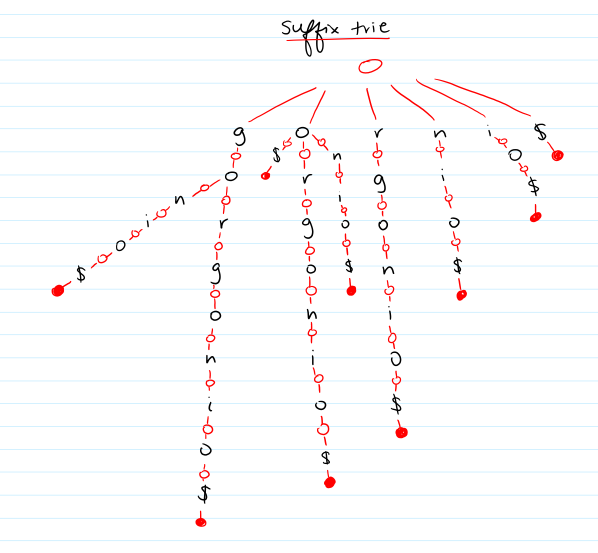

In [14]:
Image("suffix_trie.png")

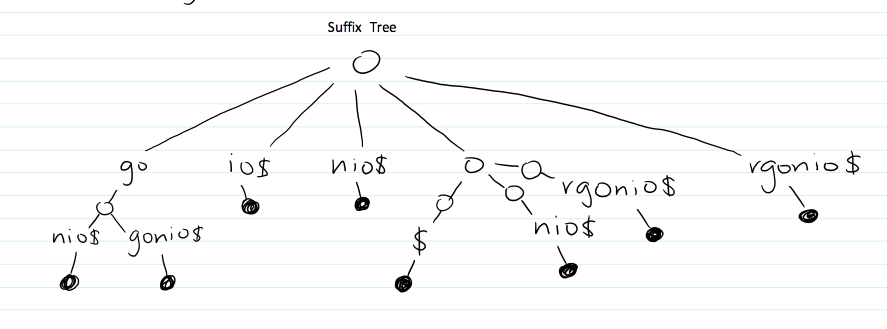

In [15]:
Image('suffix_tree.png')

# 9
## 9A In any language of your choice, create a suffix array for Gorgonio and print out the results (index, element) of your array in ascending order.

In [36]:
def build_suffix_array(t):
    SA = sorted([(t[i:], i) for i in range(0, len(t))])
#     SA = [item[1] for item in SA]
    return SA

gorgonio_sa = build_suffix_array('gorgonio$')
df = pd.DataFrame(gorgonio_sa)
df.rename(index=str, columns={0: 'Suffix', 1: 'index'})

,Suffix,index
0,$,8
1,gonio$,3
2,gorgonio$,0
3,io$,6
4,nio$,5
5,o$,7
6,onio$,4
7,orgonio$,1
8,rgonio$,2


## 9B Next, implement a “Query” method for your suffix array using the binary search method. Please include your well-documented code in your submission.

In [70]:
def binarysearchSA(SA, query):
    suffixes = SA
    #Set left and right boundaries
#     suffixes = sorted([data[i:] for i in range(len(data))])
#     print(suffixes)
#     suffixes = build_suffix_array(data)
#     print(suffixes)
    n = len(query)
    left, right = 0, (len(suffixes)-1)
    
    indices = []
    while left <= right: 
        middle = math.floor((left+right) / 2)
        if suffixes[middle][0].startswith(query):
            indices.append(suffixes[middle][1])
            above_index = middle -1 
            below_index = middle +1
            while suffixes[above_index][0].startswith(query):
                indices.append(suffixes[above_index][1])
                above_index = above_index -1
            while suffixes[below_index][0].startswith(query):
                indices.append(suffixes[below_index][1])
                below_index = below_index +1   
            return ('Query sequence was found at {0} indices'.format((tuple(sorted(indices)))))
        
        elif suffixes[middle][0] > query:
            #Change the right boundary
            right = middle - 1 
        else: 
            #Change the left boundary
            left = middle + 1 
    else:
        print('The query does not exist in the sequence')
    return 

# build_suffix_array('gorgonio$')
testing = binarysearchSA(build_suffix_array('gorgonio$'), 'o')
print(testing)
    

Query sequence was found at (1, 4, 7) indices


In [68]:
chr1 = (open('chr1', 'r').read())
chr1_SA = build_suffix_array(chr1)

In [71]:
query1 = 'atattaacaaagccaaaagtttcaaacttt'
query2 = 'aaaattat'
query1_indices = binarysearchSA(chr1_SA, query1)
query2_indices = binarysearchSA(chr1_SA, query2)
print(query1_indices)
print(query2_indices)

Query sequence was found at (62183,) indices
Query sequence was found at (33625, 35996, 40932, 62568, 77125, 77895, 85274, 89486, 92633, 96008, 99883) indices


# 10. When searching for a motif using k-mer enumeration, what’s the rationale for using the entropy metric rather than a simple difference score? Provide a simple example that illustrate this.

With a consensus sequence, you lose a lot of information about the sequences (is a position really conserved or is there just a nucleotide that barely predominates? Are there more than one base that are roughly the same frequency?)
In contrast, the entropy metric gives you the information that the consensus sequence does... and more! 
Entropy metric allows you to weight postions that have been conserved. 
For example: Imagine a 2 nucleotide profiles:

|Count Motifs     | Position 1 | Position 2 | Position 3 |
|-----------------|------------|------------|------------|
| A               | 0          | 3          | 0
| G               | 0          | 3          | 0
| C               | 14         | 5          | 8
| T               | 0          | 3          | 6
|Consensus        | C          | C          | C
|Simple difference| 0          | 9          | 6



|Profile Motifs   | Position 1 | Position 2 | Position 3 |
|-----------------|------------|------------|------------|
| A               | 0          | 0.214      | 0
| G               | 0          | 0.214      | 0
| C               | 1          | 0.357      | 0.57
| T               | 0          | 0.214      | 0.53
|Entropy          | 0          | 1.95       | 0.95

The consensus sequence here is CCC... with the simple distance score, you have no idea about the distribution of the other positions. While we know the distribution for position 1 (there are only C's), position 2 has a simple distance score of 9 and position 3 has a simple distance score of 6. Both of these scores are relatively high, but we have no idea that position 2 is actually distributed among all four bases and position 3 only has 2 bases represented. The simple distance score just cannot communicate these details. 
The entropy score shows a lot more though. We know that at position 1 there is only C, at position 2 all nucleotides are almost equally probable of occurring, and position 3 is more conserved than position 2 (meaning that what bases occur are less distributed among the 4 nucleotides)